In [58]:
import pandas as pd
import numpy as np

In [4]:
##ATP 2015 is now atp_2016 but the variable name has not changed
##ATP 2015 is now atp_2016 but the variable name has not changed
##ATP 2015 is now atp_2016 but the variable name has not changed
#this so we can run the same code, and not change all the variable names, but using 2016 file

In [59]:
#import player statistic csv into dataframe
atp_2015 = pd.read_csv("atp_2016.csv")
atp_2015.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32.0,A,20160104.0,300.0,105683.0,4.0,NaN,...,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32.0,A,20160104.0,299.0,103819.0,1.0,NaN,...,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32.0,A,20160104.0,298.0,105683.0,4.0,NaN,...,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32.0,A,20160104.0,297.0,103819.0,1.0,NaN,...,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32.0,A,20160104.0,296.0,106233.0,8.0,NaN,...,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [60]:
#list column headers/names 
atp_2015.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [61]:
#look for surface type in 'surface column', create separate dataframes for each 
surface_grass = atp_2015['surface'] == "Grass"
surface_clay = atp_2015["surface"]=="Clay"
surface_hard = atp_2015["surface"]=="Hard"
surface_clay_df = atp_2015[surface_clay]
surface_hard_df = atp_2015[surface_hard]
surface_df = atp_2015[surface_grass]

In [62]:
#separate winners and losers by which hand they play, create new dataframes 
player_win_right = atp_2015["winner_hand"] == "R"
player_winners_right_df = atp_2015[player_win_right]
player_loser_right = atp_2015["loser_hand"] =="R"
player_loser_right_df = atp_2015[player_loser_right]
player_win_left = atp_2015["winner_hand"] == "L"
player_winner_left_df = atp_2015[player_win_left]
player_loser_left = atp_2015["loser_hand"] =="L"
player_loser_left_df = atp_2015[player_loser_left]

In [63]:
#how many wins did player x have against right handers? How many losses against right handers?
winners_right = pd.DataFrame(player_loser_right_df["winner_name"].value_counts())
losers_right = pd.DataFrame(player_winners_right_df["loser_name"].value_counts())
winners_right.head()

,winner_name
Andy Murray,71
Novak Djokovic,53
Dominic Thiem,51
Kei Nishikori,51
Milos Raonic,49


In [64]:
#how many wins did player x have against left handers? How many losses against left handers? -fb
winners_left = pd.DataFrame(player_loser_left_df["winner_name"].value_counts())
losers_left = pd.DataFrame(player_winner_left_df["loser_name"].value_counts())
winners_left.head()

,winner_name
Pablo Cuevas,13
Roberto Bautista Agut,11
Novak Djokovic,10
David Goffin,8
Grigor Dimitrov,8


In [65]:
#combine wins and losses against left handers, calc win % 
combined_RL1 = winners_left.join(losers_left, how = "outer")
combined_RL_Left = combined_RL1.fillna(0)
combined_RL_Left = combined_RL_Left.rename(index = str, columns = {"winner_name": "wins", "loser_name": "losses"})
combined_RL_Left["Left_hand_win_pct"] = combined_RL_Left["wins"]/(combined_RL_Left["wins"]+combined_RL_Left["losses"])
combined_RL_Left.head()

,wins,losses,Left_hand_win_pct
Adrian Mannarino,4.0,4.0,0.500000
Adrian Ungur,0.0,1.0,0.000000
Agustin Velotti,0.0,1.0,0.000000
Albert Montanes,1.0,5.0,0.166667
Albert Ramos,7.0,3.0,0.700000


In [66]:
#combine wins and losses against right handers, calc win%
combined_RL = winners_right.join(losers_right,how = "outer")
combined_RL_Right = combined_RL.fillna(0)
combined_RL_Right= combined_RL_Right.rename(index = str, columns = {"winner_name": "wins", "loser_name": "losses"})
combined_RL_Right["right_hand_win_pct"] = combined_RL_Right["wins"]/(combined_RL_Right["wins"]+combined_RL_Right["losses"])
combined_RL_Right.head()

,wins,losses,right_hand_win_pct
Adam Pavlasek,3.0,3.0,0.500000
Adrian Mannarino,21.0,24.0,0.466667
Adrian Ungur,1.0,2.0,0.333333
Akira Santillan,0.0,2.0,0.000000
Albano Olivetti,0.0,1.0,0.000000


In [67]:
#isolate win %, drop other columns 
del combined_RL_Right["wins"]
del combined_RL_Left["wins"]
del combined_RL_Right["losses"]
del combined_RL_Left["losses"]
combined_RL_Right.head()

,right_hand_win_pct
Adam Pavlasek,0.500000
Adrian Mannarino,0.466667
Adrian Ungur,0.333333
Akira Santillan,0.000000
Albano Olivetti,0.000000


In [68]:
surface_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1348,2016-M010,s-Hertogenbosch,Grass,32.0,A,20160606.0,300.0,103917.0,8.0,NaN,...,4.0,9.0,1.0,62.0,38.0,25.0,10.0,10.0,0.0,3.0
1349,2016-M010,s-Hertogenbosch,Grass,32.0,A,20160606.0,299.0,104180.0,7.0,NaN,...,0.0,21.0,6.0,72.0,47.0,42.0,15.0,12.0,0.0,0.0
1350,2016-M010,s-Hertogenbosch,Grass,32.0,A,20160606.0,298.0,103917.0,8.0,NaN,...,2.0,19.0,1.0,98.0,64.0,50.0,20.0,16.0,6.0,8.0
1351,2016-M010,s-Hertogenbosch,Grass,32.0,A,20160606.0,297.0,104180.0,7.0,NaN,...,5.0,3.0,3.0,102.0,63.0,45.0,29.0,16.0,4.0,5.0
1352,2016-M010,s-Hertogenbosch,Grass,32.0,A,20160606.0,296.0,103333.0,3.0,NaN,...,3.0,4.0,5.0,54.0,30.0,24.0,10.0,9.0,4.0,6.0


In [69]:
#group winners/losers by wins and losses by surface type, count
winners_clay = pd.DataFrame(surface_clay_df["winner_name"].value_counts())
losers_clay = pd.DataFrame(surface_clay_df["loser_name"].value_counts())
winners_hard = pd.DataFrame(surface_hard_df["winner_name"].value_counts())
losers_hard = pd.DataFrame(surface_hard_df["loser_name"].value_counts())
winners_grass = pd.DataFrame(surface_df["winner_name"].value_counts())
losers_grass = pd.DataFrame(surface_df["loser_name"].value_counts())

In [70]:
winners_clay = winners_clay.reset_index()
losers_clay = losers_clay.reset_index()
winners_hard = winners_hard.reset_index()
losers_hard = losers_hard.reset_index()
winner_grass = winners_grass.reset_index()
losers_grass = losers_grass.reset_index()

In [71]:
#merge the winner and loser dataframes by surface
merged_win_lose_clay = pd.merge(winners_clay, losers_clay, how ="outer")
merged_win_lose_hard = pd.merge(winners_hard, losers_hard, how = "outer")
merged_win_lose_grass = pd.merge(winner_grass, losers_grass, how = "outer")

In [72]:
#rename columns 
merged_win_lose_clay = merged_win_lose_clay.rename(index = str, columns = {"winner_name": "wins", "loser_name": "losses"})
merged_win_lose_hard = merged_win_lose_hard.rename(index = str, columns = {"winner_name": "wins", "loser_name": "losses"})
merged_win_lose_grass = merged_win_lose_grass.rename(index=str, columns={"winner_name": "wins","loser_name":"losses"})

In [73]:
merged_win_lose_clay = merged_win_lose_clay.fillna(0)
merged_win_lose_hard  = merged_win_lose_hard.fillna(0)
merged_win_lose_grass = merged_win_lose_grass.fillna(0)

In [74]:
#calculate win % by surface 
merged_win_lose_grass["win_pct_grass"] = merged_win_lose_grass["wins"]/(merged_win_lose_grass["wins"]+merged_win_lose_grass["losses"])
merged_win_lose_clay["win_pct_clay"] = merged_win_lose_clay["wins"]/(merged_win_lose_clay["wins"]+merged_win_lose_clay["losses"])
merged_win_lose_hard["win_pct_hard"] = merged_win_lose_hard["wins"]/(merged_win_lose_hard["wins"]+merged_win_lose_hard["losses"])

In [75]:
merged_win_lose_grass = merged_win_lose_grass.set_index("index")
merged_win_lose_hard = merged_win_lose_hard.set_index("index")
merged_win_lose_clay = merged_win_lose_clay.set_index("index")

In [76]:
#delete columns to isolate win % 
del merged_win_lose_grass["wins"]
del merged_win_lose_grass["losses"]
del merged_win_lose_clay["wins"]
del merged_win_lose_clay["losses"]
del merged_win_lose_hard["wins"]
del merged_win_lose_hard["losses"]

In [77]:
merged_win_lose_hard.head()

,win_pct_hard
index,
Novak Djokovic,0.882353
Andy Murray,0.900000
Kei Nishikori,0.727273
Gael Monfils,0.740000
Roberto Bautista Agut,0.686275


In [78]:
#create list of players by winner name
players = atp_2015["winner_name"]

In [79]:
#grab unqique only
players_list = players.unique()

In [80]:
##change players_list to players_list_test for testing
stat_player_df = pd.DataFrame({'name':players_list})

In [81]:
len(stat_player_df)

209

In [82]:
#start process of getting winner player stats, group by winner name
grouped_atp_2015 = atp_2015.groupby(["winner_name"])

In [83]:
#sum up all the stat numbers, per winner, (important to note: 'stats' are not in % form, 
#just number of each per match played)
aces = grouped_atp_2015["w_ace"].sum()
service_games = grouped_atp_2015["w_SvGms"].sum()
first_serve_in = grouped_atp_2015["w_1stIn"].sum()
first_serves_won = grouped_atp_2015["w_1stWon"].sum()
doubfts = grouped_atp_2015["w_df"].sum()
total_brk_saved = grouped_atp_2015["w_bpSaved"].sum()
total_brk_faced = grouped_atp_2015["w_bpFaced"].sum()
rt_games_total = grouped_atp_2015["l_SvGms"].sum()
break_point_opp_total = grouped_atp_2015["l_bpFaced"].sum()
break_point_opp_loss = grouped_atp_2015["l_bpSaved"].sum()
svpt_total = grouped_atp_2015["w_svpt"].sum()



In [84]:
#doing same as above for all the losers
grouped_atp_2015_losers = atp_2015.groupby(["loser_name"])

In [85]:
aces_1 = grouped_atp_2015_losers["l_ace"].sum()
service_games_1 = grouped_atp_2015_losers["l_SvGms"].sum()
first_serve_in_l = grouped_atp_2015_losers["l_1stIn"].sum()
first_serves_won_l = grouped_atp_2015_losers["l_1stWon"].sum()
doubfts_l = grouped_atp_2015_losers["l_df"].sum()
total_brk_saved_l = grouped_atp_2015_losers["l_bpSaved"].sum()
total_brk_faced_l = grouped_atp_2015_losers["l_bpFaced"].sum()
rt_games_total_l = grouped_atp_2015_losers["w_SvGms"].sum()
break_point_opp_total_l = grouped_atp_2015_losers["w_bpFaced"].sum()
break_point_opp_loss_l = grouped_atp_2015_losers["w_bpSaved"].sum()
svpt_total_l = grouped_atp_2015_losers["l_svpt"].sum()

In [86]:
#create a new dataframe with just the stats sums, for losers..
updated_stats_players_l = pd.DataFrame({"aces":aces_1,
                                   "service_games":service_games_1,
                                     "first_serve_in": first_serve_in_l,
                                     "first_serves_won": first_serves_won_l,
                                     "doubfts": doubfts_l,
                                     "total_brk_saved": total_brk_saved_l,
                                     "total_brk_faced": total_brk_faced_l,
                                     "rt_games_total": rt_games_total_l,
                                     "break_point_opp_total": break_point_opp_total_l,
                                     "break_point_opp_loss": break_point_opp_loss_l,
                                     "svpt_total": svpt_total_l})
updated_stats_players_l.head(20)

,aces,break_point_opp_loss,break_point_opp_total,doubfts,first_serve_in,first_serves_won,rt_games_total,service_games,svpt_total,total_brk_faced,total_brk_saved
loser_name,,,,,,,,,,,
Adam Pavlasek,20.0,5.0,8.0,12.0,163.0,116.0,41.0,41.0,266.0,23.0,13.0
Adrian Mannarino,114.0,93.0,141.0,97.0,1256.0,834.0,330.0,323.0,2087.0,243.0,133.0
Adrian Ungur,4.0,10.0,17.0,13.0,177.0,103.0,41.0,40.0,277.0,38.0,23.0
Agustin Velotti,1.0,9.0,10.0,3.0,35.0,22.0,9.0,9.0,63.0,9.0,5.0
Akira Santillan,6.0,6.0,6.0,4.0,61.0,39.0,18.0,18.0,112.0,12.0,6.0
Albano Olivetti,56.0,1.0,1.0,17.0,128.0,108.0,36.0,35.0,218.0,13.0,11.0
Albert Montanes,29.0,13.0,21.0,26.0,399.0,266.0,105.0,102.0,646.0,59.0,32.0
Albert Ramos,101.0,100.0,156.0,92.0,1491.0,970.0,376.0,367.0,2435.0,263.0,145.0
Aldin Setkic,6.0,1.0,2.0,8.0,93.0,58.0,16.0,15.0,133.0,14.0,10.0


In [87]:
#create a dataframe with just the stat sums, for winners
updated_stats_players = pd.DataFrame({"aces":aces,
                                   "service_games":service_games,
                                     "first_serve_in": first_serve_in,
                                     "first_serves_won": first_serves_won,
                                     "doubfts": doubfts,
                                     "total_brk_saved": total_brk_saved,
                                     "total_brk_faced": total_brk_faced,
                                     "rt_games_total": rt_games_total,
                                     "break_point_opp_total": break_point_opp_total,
                                     "break_point_opp_loss": break_point_opp_loss,
                                     "svpt_total": svpt_total})
updated_stats_players.head()

,aces,break_point_opp_loss,break_point_opp_total,doubfts,first_serve_in,first_serves_won,rt_games_total,service_games,svpt_total,total_brk_faced,total_brk_saved
winner_name,,,,,,,,,,,
Adam Pavlasek,16.0,14.0,28.0,8.0,164.0,115.0,38.0,40.0,276.0,26.0,19.0
Adrian Mannarino,150.0,134.0,242.0,72.0,1226.0,913.0,321.0,326.0,2070.0,145.0,96.0
Adrian Ungur,0.0,2.0,8.0,0.0,25.0,18.0,9.0,9.0,59.0,7.0,4.0
Albert Montanes,20.0,34.0,59.0,19.0,225.0,184.0,70.0,69.0,388.0,12.0,6.0
Albert Ramos,138.0,187.0,331.0,85.0,1866.0,1322.0,441.0,451.0,2897.0,235.0,164.0


In [88]:
frames = [updated_stats_players,updated_stats_players_l]

In [89]:
#combine the dataframes, one on top of the other
results = pd.concat(frames)

In [90]:
results = results.reset_index()

In [91]:
#group by index, which is now player name
full_player_stats = results.groupby(["index"])

In [92]:
len(full_player_stats.groups)

303

In [93]:
#sum the stats, by player name
total_player_stats = full_player_stats.sum()

In [94]:
#create/calc the actual player statistics
total_player_stats["ace_pct"] = total_player_stats["aces"]/total_player_stats["svpt_total"]
total_player_stats["df_pct"] = total_player_stats["doubfts"]/total_player_stats["svpt_total"]
total_player_stats["first_serve_won_pct"] = total_player_stats["first_serves_won"]/total_player_stats["first_serve_in"]
total_player_stats["broken_pct"] = (total_player_stats["total_brk_faced"]-total_player_stats["total_brk_saved"])/total_player_stats["service_games"]
total_player_stats["breaking_pct"] = (total_player_stats["break_point_opp_total"]-total_player_stats["break_point_opp_loss"])/total_player_stats["rt_games_total"]
total_player_stats["break_conversion_pct"] = (total_player_stats["break_point_opp_total"]-total_player_stats["break_point_opp_loss"])/total_player_stats["break_point_opp_total"]

In [95]:
total_player_stats = total_player_stats.fillna(0)
total_player_stats.head()

,aces,break_point_opp_loss,break_point_opp_total,doubfts,first_serve_in,first_serves_won,rt_games_total,service_games,svpt_total,total_brk_faced,total_brk_saved,ace_pct,df_pct,first_serve_won_pct,broken_pct,breaking_pct,break_conversion_pct
index,,,,,,,,,,,,,,,,,
Adam Pavlasek,36.0,19.0,36.0,20.0,327.0,231.0,79.0,81.0,542.0,49.0,32.0,0.066421,0.036900,0.706422,0.209877,0.215190,0.472222
Adrian Mannarino,264.0,227.0,383.0,169.0,2482.0,1747.0,651.0,649.0,4157.0,388.0,229.0,0.063507,0.040654,0.703868,0.244992,0.239631,0.407311
Adrian Ungur,4.0,12.0,25.0,13.0,202.0,121.0,50.0,49.0,336.0,45.0,27.0,0.011905,0.038690,0.599010,0.367347,0.260000,0.520000
Agustin Velotti,1.0,9.0,10.0,3.0,35.0,22.0,9.0,9.0,63.0,9.0,5.0,0.015873,0.047619,0.628571,0.444444,0.111111,0.100000
Akira Santillan,6.0,6.0,6.0,4.0,61.0,39.0,18.0,18.0,112.0,12.0,6.0,0.053571,0.035714,0.639344,0.333333,0.000000,0.000000


In [96]:
#add grass court win %
total_player_stats = total_player_stats.join(merged_win_lose_grass,how = "outer")

In [97]:
#add clay court, hard court win % and stats against left and right handers..
total_player_stats = total_player_stats.join(merged_win_lose_clay, how = "outer")
total_player_stats = total_player_stats.join(merged_win_lose_hard, how = "outer")
total_player_stats = total_player_stats.join(combined_RL_Left, how = "outer")
total_player_stats = total_player_stats.join(combined_RL_Right, how = "outer")


In [98]:
total_player_stats = total_player_stats.fillna(0)

In [99]:
total_player_stats.head()

,aces,break_point_opp_loss,break_point_opp_total,doubfts,first_serve_in,first_serves_won,rt_games_total,service_games,svpt_total,total_brk_faced,...,df_pct,first_serve_won_pct,broken_pct,breaking_pct,break_conversion_pct,win_pct_grass,win_pct_clay,win_pct_hard,Left_hand_win_pct,right_hand_win_pct
Adam Pavlasek,36.0,19.0,36.0,20.0,327.0,231.0,79.0,81.0,542.0,49.0,...,0.036900,0.706422,0.209877,0.215190,0.472222,0.000000,0.600000,0.0000,0.0,0.500000
Adrian Mannarino,264.0,227.0,383.0,169.0,2482.0,1747.0,651.0,649.0,4157.0,388.0,...,0.040654,0.703868,0.244992,0.239631,0.407311,0.615385,0.444444,0.4375,0.5,0.466667
Adrian Ungur,4.0,12.0,25.0,13.0,202.0,121.0,50.0,49.0,336.0,45.0,...,0.038690,0.599010,0.367347,0.260000,0.520000,0.000000,0.250000,0.0000,0.0,0.333333
Agustin Velotti,1.0,9.0,10.0,3.0,35.0,22.0,9.0,9.0,63.0,9.0,...,0.047619,0.628571,0.444444,0.111111,0.100000,0.000000,0.000000,0.0000,0.0,0.000000
Akira Santillan,6.0,6.0,6.0,4.0,61.0,39.0,18.0,18.0,112.0,12.0,...,0.035714,0.639344,0.333333,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000


In [46]:
##matchups_2016 is now matchups_2017 but the variable name is not has not changed
##matchups_2016 is now matchups_2017 but the variable name is not has not changed
##matchups_2016 is now matchups_2017 but the variable name is not has not changed

In [100]:
#bring in results of 2017 matches, get player matchups to predict with 2016 stats
matchups_2016 = pd.read_csv("2017_match_results.csv")
# matchups_2016 = matchups_2016[['Player 1.1', 'Player 2.1', 'Player_1_Win.1']]
matchups_2016.head()

,surface,player_1_win,player_1,Player_1_hand,Player_1_age,player_2,Player_2_hand,Player_2_age
0,Clay,0,Alexandr Dolgopolov,R,28.689938,David Ferrer,R,35.290897
1,Clay,1,Alexandr Dolgopolov,R,28.689938,Andrey Kuznetsov,R,26.398357
2,Clay,1,David Ferrer,R,35.290897,Fernando Verdasco,L,33.670089
3,Clay,0,Diego Sebastian Schwartzman,R,24.917180,Andrey Kuznetsov,R,26.398357
4,Clay,0,Karen Khachanov,R,21.155373,Alexandr Dolgopolov,R,28.689938


In [101]:
#isolate columns 
matchups_2016 = matchups_2016[['surface', 'player_1_win', 'player_1','player_2', 'Player_1_hand','Player_2_hand']]
matchups_2016.head()

,surface,player_1_win,player_1,player_2,Player_1_hand,Player_2_hand
0,Clay,0,Alexandr Dolgopolov,David Ferrer,R,R
1,Clay,1,Alexandr Dolgopolov,Andrey Kuznetsov,R,R
2,Clay,1,David Ferrer,Fernando Verdasco,R,L
3,Clay,0,Diego Sebastian Schwartzman,Andrey Kuznetsov,R,R
4,Clay,0,Karen Khachanov,Alexandr Dolgopolov,R,R


In [ ]:
# matchups_2016['ace_pct'] = 0
# ace_pct = total_player_stats.loc['Roger Federer']['ace_pct'] - total_player_stats.loc['Milos Raonic']['ace_pct']
# print(type(ace_pct))
# matchups_2016.loc[0,'ace_pct'] = ace_pct
# matchups_2016.head()

In [102]:
#create new statistic columns, initiate as 0, loop thru player stats and get difference in statistic, player 1 - player 2
#prepping for ML algo

matchups_2016['ace_pct'] = 0
matchups_2016['df_pct'] = 0
matchups_2016['first_serve_pct'] = 0
matchups_2016['broken_pct'] = 0
matchups_2016['breaking_pct'] = 0
matchups_2016['break_conversion_pct'] = 0
matchups_2016["surface_win_pct"] = 0
matchups_2016["player_hand_win_pct"] = 0
count_unknown_hand = 0

for index, row in matchups_2016.iterrows():
    player_1 = row['player_1']
    player_2 = row['player_2']
    if player_1 in total_player_stats.index and player_2 in total_player_stats.index:
        ace_pct = total_player_stats.loc[player_1]['ace_pct'] - total_player_stats.loc[player_2]['ace_pct']
        df_pct = total_player_stats.loc[player_1]['df_pct'] - total_player_stats.loc[player_2]['df_pct']
        first_serve_pct = total_player_stats.loc[player_1]['first_serve_won_pct'] - total_player_stats.loc[player_2]['first_serve_won_pct']
        broken_pct = total_player_stats.loc[player_1]['broken_pct'] - total_player_stats.loc[player_2]['broken_pct']
        breaking_pct = total_player_stats.loc[player_1]['breaking_pct'] - total_player_stats.loc[player_2]['breaking_pct']
        break_conversion_pct = total_player_stats.loc[player_1]['break_conversion_pct'] - total_player_stats.loc[player_2]['break_conversion_pct']
        if row["surface"] == "Hard":
            surface_win_pct = total_player_stats.loc[player_1]["win_pct_hard"]-total_player_stats.loc[player_2]["win_pct_hard"]
        elif row["surface"] == "Clay":
            surface_win_pct = total_player_stats.loc[player_1]["win_pct_clay"]-total_player_stats.loc[player_2]["win_pct_clay"]
        elif row["surface"] == "Grass":
            surface_win_pct = total_player_stats.loc[player_1]["win_pct_grass"]-total_player_stats.loc[player_2]["win_pct_grass"]
        else:
            print("something went wrong...")
        
        if row["Player_1_hand"] == "R":
            if row["Player_2_hand"] == "R":
                player_hand_win_pct = total_player_stats.loc[player_1]["right_hand_win_pct"]-total_player_stats.loc[player_2]["right_hand_win_pct"]
            elif row["Player_2_hand"] == "L":
                player_hand_win_pct = total_player_stats.loc[player_1]["Left_hand_win_pct"]-total_player_stats.loc[player_2]["right_hand_win_pct"]
            else:
                print("unknown")
                count_unknown_hand+=1   
        elif row["Player_1_hand"] == "L":
            if row["Player_2_hand"] == "R":
                player_hand_win_pct = total_player_stats.loc[player_1]["right_hand_win_pct"]-total_player_stats.loc[player_2]["Left_hand_win_pct"]
            elif row["Player_2_hand"] == "L":
                player_hand_win_pct = total_player_stats.loc[player_1]["Left_hand_win_pct"]-total_player_stats.loc[player_2]["Left_hand_win_pct"]
            else:
                print("unknown")
                count_unknown_hand+=1
            
            
        matchups_2016.loc[index, 'ace_pct'] =  ace_pct
        matchups_2016.loc[index, 'df_pct'] = df_pct
        matchups_2016.loc[index, 'first_serve_pct'] = first_serve_pct
        matchups_2016.loc[index, 'broken_pct'] = broken_pct
        matchups_2016.loc[index, 'breaking_pct'] =  breaking_pct
        matchups_2016.loc[index, 'break_conversion_pct'] = break_conversion_pct
        matchups_2016.loc[index, 'surface_win_pct'] = surface_win_pct
        matchups_2016.loc[index, "player_hand_win_pct"] = player_hand_win_pct
    else: 
        continue
    
len(matchups_2016)

unknown
unknown
unknown
something went wrong...
something went wrong...
something went wrong...
something went wrong...
something went wrong...
something went wrong...
something went wrong...
unknown
unknown
unknown
unknown
unknown


2872

In [104]:
matchups_2016 = matchups_2016[matchups_2016.first_serve_pct != 0]
len(matchups_2016)

2511

In [105]:
matchups_2016.head()

,surface,player_1_win,player_1,player_2,Player_1_hand,Player_2_hand,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct
0,Clay,0,Alexandr Dolgopolov,David Ferrer,R,R,0.058473,0.003827,0.036051,0.011237,-0.076718,-0.036004,-0.126263,-0.091737
1,Clay,1,Alexandr Dolgopolov,Andrey Kuznetsov,R,R,0.024493,0.000768,-0.014330,0.019776,-0.023977,-0.022118,0.010101,-0.019841
2,Clay,1,David Ferrer,Fernando Verdasco,R,L,-0.044185,-0.009779,-0.028074,0.011122,0.050696,0.035498,0.045455,-0.100000
3,Clay,0,Diego Sebastian Schwartzman,Andrey Kuznetsov,R,R,-0.041389,-0.012123,-0.083581,0.081048,0.063382,0.067013,0.017045,-0.091270
4,Clay,0,Karen Khachanov,Alexandr Dolgopolov,R,R,0.003451,-0.007213,0.011761,-0.046018,0.016777,0.049394,0.000000,0.052521


In [106]:
#read in csv that has been created with all possible player matchups with the group of players each as won and lost against
#in 2016; along with calculated/created 'parameter' which is indicative of player 1 losses to players that player 2 has beaten
parameter_match_ups = pd.read_csv('matchups_parameters_2.csv')

In [107]:
parameter_match_ups.head()

,Unnamed: 0,player_1,player_2,player_1_losses,player_1_wins,player_2_losses,player_2_wins,player_1_losses_in_player_2_wins,player_2_losses_in_player_1_wins,player_1_wins_in_player_2_wins,player_1_losses_in_player_2_losses,parameters_value
0,0,Roger Federer,Dominic Thiem,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Roger Federer', 'Gilles Muller', 'David Goff...","['Marin Cilic', 'Denis Kudla', 'James Duckwort...",1,4,8,4,0.020000
1,1,Roger Federer,Bernard Tomic,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Milos Raonic', 'Teymuraz Gabashvili', 'Andy ...","['Kei Nishikori', 'Radek Stepanek', 'Nicolas M...",0,2,3,2,0.000000
2,2,Roger Federer,Grigor Dimitrov,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Roger Federer', 'Viktor Troicki', 'Roger Fed...","['Viktor Troicki', 'Gilles Simon', 'Gilles Mul...",0,5,2,3,0.000000
3,3,Roger Federer,Marin Cilic,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Dominic Thiem', 'Roberto Bautista Agut', 'Al...","['Hyeon Chung', 'Thiemo De Bakker', 'Albert Ra...",1,4,4,2,0.020000
4,4,Roger Federer,Lucas Pouille,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Milos Raonic', 'Milos Raonic', 'Andrey Kuzne...","['David Goffin', 'Yoshihito Nishioka', 'David ...",1,2,4,2,0.033333


In [108]:
del parameter_match_ups["Unnamed: 0"]


In [109]:
parameter_match_ups.head(5)

,player_1,player_2,player_1_losses,player_1_wins,player_2_losses,player_2_wins,player_1_losses_in_player_2_wins,player_2_losses_in_player_1_wins,player_1_wins_in_player_2_wins,player_1_losses_in_player_2_losses,parameters_value
0,Roger Federer,Dominic Thiem,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Roger Federer', 'Gilles Muller', 'David Goff...","['Marin Cilic', 'Denis Kudla', 'James Duckwort...",1,4,8,4,0.020000
1,Roger Federer,Bernard Tomic,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Milos Raonic', 'Teymuraz Gabashvili', 'Andy ...","['Kei Nishikori', 'Radek Stepanek', 'Nicolas M...",0,2,3,2,0.000000
2,Roger Federer,Grigor Dimitrov,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Roger Federer', 'Viktor Troicki', 'Roger Fed...","['Viktor Troicki', 'Gilles Simon', 'Gilles Mul...",0,5,2,3,0.000000
3,Roger Federer,Marin Cilic,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Dominic Thiem', 'Roberto Bautista Agut', 'Al...","['Hyeon Chung', 'Thiemo De Bakker', 'Albert Ra...",1,4,4,2,0.020000
4,Roger Federer,Lucas Pouille,"['Milos Raonic', 'Novak Djokovic', 'Jo Wilfrie...","['Dominic Thiem', 'Grigor Dimitrov', 'Tobias K...","['Milos Raonic', 'Milos Raonic', 'Andrey Kuzne...","['David Goffin', 'Yoshihito Nishioka', 'David ...",1,2,4,2,0.033333


In [110]:
#merge this with our player statistics, on player names
merging_matching = pd.merge(matchups_2016, parameter_match_ups, how='left', left_on=['player_1','player_2'], right_on = ['player_1','player_2'])

In [111]:
merging_matching.head()

,surface,player_1_win,player_1,player_2,Player_1_hand,Player_2_hand,ace_pct,df_pct,first_serve_pct,broken_pct,...,player_hand_win_pct,player_1_losses,player_1_wins,player_2_losses,player_2_wins,player_1_losses_in_player_2_wins,player_2_losses_in_player_1_wins,player_1_wins_in_player_2_wins,player_1_losses_in_player_2_losses,parameters_value
0,Clay,0,Alexandr Dolgopolov,David Ferrer,R,R,0.058473,0.003827,0.036051,0.011237,...,-0.091737,"['Grigor Dimitrov', 'Roger Federer', 'Diego Se...","['Alexander Sarkissian', 'Thomaz Bellucci', 'R...","['Illya Marchenko', 'Jack Sock', 'Andy Murray'...","['Lukas Rosol', 'Matthew Barton', 'Peter Gojow...",0,3,3,2,0.00
1,Clay,1,Alexandr Dolgopolov,Andrey Kuznetsov,R,R,0.024493,0.000768,-0.014330,0.019776,...,-0.019841,"['Grigor Dimitrov', 'Roger Federer', 'Diego Se...","['Alexander Sarkissian', 'Thomaz Bellucci', 'R...","['Rafael Nadal', 'Gael Monfils', 'Viktor Troic...","['Ricardas Berankis', 'Marsel Ilhan', 'Ryan Ha...",1,1,5,1,0.05
2,Clay,1,David Ferrer,Fernando Verdasco,R,L,-0.044185,-0.009779,-0.028074,0.011122,...,-0.100000,"['Illya Marchenko', 'Jack Sock', 'Andy Murray'...","['Lukas Rosol', 'Matthew Barton', 'Peter Gojow...","['Novak Djokovic', 'Dudi Sela', 'Renzo Olivo',...","['Malek Jaziri', 'Rafael Nadal', 'Martin Kliza...",4,4,5,4,0.05
3,Clay,0,Diego Sebastian Schwartzman,Andrey Kuznetsov,R,R,-0.041389,-0.012123,-0.083581,0.081048,...,-0.091270,"['John Millman', 'Paolo Lorenzi', 'Dominic Thi...","['Alexandr Dolgopolov', 'Joao Souza', 'Horacio...","['Rafael Nadal', 'Gael Monfils', 'Viktor Troic...","['Ricardas Berankis', 'Marsel Ilhan', 'Ryan Ha...",1,1,1,2,0.05
4,Clay,0,Karen Khachanov,Alexandr Dolgopolov,R,R,0.003451,-0.007213,0.011761,-0.046018,...,0.052521,"['Gilles Muller', 'Alexandr Dolgopolov', 'Albe...","['Roberto Bautista Agut', 'Aljaz Bedene', 'Alj...","['Grigor Dimitrov', 'Roger Federer', 'Diego Se...","['Alexander Sarkissian', 'Thomaz Bellucci', 'R...",1,0,1,2,0.10


In [112]:
#dropNA's
merging_matching = merging_matching.dropna(axis=0,how="any")

In [113]:
#delete unwanted/uneeded columns
del merging_matching["player_1_losses"]
del merging_matching["player_1_wins"]
del merging_matching["player_2_losses"]
del merging_matching["player_2_wins"]
del merging_matching["player_1_losses_in_player_2_wins"]
del merging_matching["player_1_losses_in_player_2_losses"]
del merging_matching["player_1_wins_in_player_2_wins"]
del merging_matching["player_2_losses_in_player_1_wins"]

In [114]:
merging_matching.head()

,surface,player_1_win,player_1,player_2,Player_1_hand,Player_2_hand,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct,parameters_value
0,Clay,0,Alexandr Dolgopolov,David Ferrer,R,R,0.058473,0.003827,0.036051,0.011237,-0.076718,-0.036004,-0.126263,-0.091737,0.00
1,Clay,1,Alexandr Dolgopolov,Andrey Kuznetsov,R,R,0.024493,0.000768,-0.014330,0.019776,-0.023977,-0.022118,0.010101,-0.019841,0.05
2,Clay,1,David Ferrer,Fernando Verdasco,R,L,-0.044185,-0.009779,-0.028074,0.011122,0.050696,0.035498,0.045455,-0.100000,0.05
3,Clay,0,Diego Sebastian Schwartzman,Andrey Kuznetsov,R,R,-0.041389,-0.012123,-0.083581,0.081048,0.063382,0.067013,0.017045,-0.091270,0.05
4,Clay,0,Karen Khachanov,Alexandr Dolgopolov,R,R,0.003451,-0.007213,0.011761,-0.046018,0.016777,0.049394,0.000000,0.052521,0.10


In [115]:
len(merging_matching)

2511

In [116]:
#save to csv
merging_matching.to_csv("merging_matching_first_inputs_2.csv")

In [117]:
##if you ran the previous code, no need to run this
merging_matching = pd.read_csv("merging_matching_first_inputs.csv")
del merging_matching["Unnamed: 0"]
merging_matching.head()

FileNotFoundError: File b'merging_matching_first_inputs.csv' does not exist

In [118]:
#player_1_win = 1 is a win for player_1
merging_matching.head()

,surface,player_1_win,player_1,player_2,Player_1_hand,Player_2_hand,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct,parameters_value
0,Clay,0,Alexandr Dolgopolov,David Ferrer,R,R,0.058473,0.003827,0.036051,0.011237,-0.076718,-0.036004,-0.126263,-0.091737,0.00
1,Clay,1,Alexandr Dolgopolov,Andrey Kuznetsov,R,R,0.024493,0.000768,-0.014330,0.019776,-0.023977,-0.022118,0.010101,-0.019841,0.05
2,Clay,1,David Ferrer,Fernando Verdasco,R,L,-0.044185,-0.009779,-0.028074,0.011122,0.050696,0.035498,0.045455,-0.100000,0.05
3,Clay,0,Diego Sebastian Schwartzman,Andrey Kuznetsov,R,R,-0.041389,-0.012123,-0.083581,0.081048,0.063382,0.067013,0.017045,-0.091270,0.05
4,Clay,0,Karen Khachanov,Alexandr Dolgopolov,R,R,0.003451,-0.007213,0.011761,-0.046018,0.016777,0.049394,0.000000,0.052521,0.10


In [119]:
#prepare for ML, y, target is the player 1 win/loss...drop other info from X variable that is not part of statistics
X = merging_matching.drop(["player_1_win", "player_1", "player_2", "surface", "Player_1_hand", "Player_2_hand"], axis=1)
y = merging_matching["player_1_win"]
print(X.shape, y.shape)

(2511, 9) (2511,)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) 

In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6356877323420075
Testing Data Score: 0.6767515923566879


In [128]:
#lets' pull out the probabilities assoc with the predictions
predictions_prob = classifier.predict_proba(X_test)
predictions1 = classifier.predict(X_test)

In [125]:
clean_data = [[item for item in row] for row in predictions_prob]

In [142]:
player_prob = pd.DataFrame(clean_data, columns=["player_2_prob","player_1_prob"])

In [143]:
player_prob.head()

,player_2_prob,player_1_prob
0,0.303949,0.696051
1,0.388958,0.611042
2,0.300735,0.699265
3,0.621235,0.378765
4,0.211868,0.788132


In [130]:
#comments from stack overflow:Assuming your target is (0,1), then the classifier would output a probability 
#matrix of (N,2), The first one refers to the probability that the data belong to class 0, and the second one 
#refers to the probability that the data belong to class 1. This two would sum to 1.
#For example datapoint1 has 80% likelihood to belong to 0, and 20% belonging to 1. the output would be (0.8,0.2). 
print(clean_data[0:10])

[[0.30394856585497954, 0.69605143414502046], [0.3889577934401981, 0.6110422065598019], [0.30073459353718535, 0.69926540646281465], [0.62123486175549913, 0.37876513824450087], [0.21186842675770723, 0.78813157324229277], [0.6320819864568501, 0.36791801354314985], [0.39553402407371208, 0.60446597592628792], [0.53099928840799115, 0.46900071159200885], [0.58280941871403358, 0.41719058128596642], [0.32424644290861493, 0.67575355709138507]]


In [131]:
print(y_test[0:5])

356     0
655     0
491     1
1800    1
1196    1
Name: player_1_win, dtype: int64


In [144]:
predictions_dataframe = X_test

In [145]:
#bring back index so can merge with player names
player_prob['index'] = predictions_dataframe.index
player_prob = player_prob.set_index('index')

In [146]:
player_prob.head()

,player_2_prob,player_1_prob
index,,
356,0.303949,0.696051
655,0.388958,0.611042
491,0.300735,0.699265
1800,0.621235,0.378765
1196,0.211868,0.788132


In [147]:
player_prob_merge = predictions_dataframe.join(player_prob, how = "inner")

In [148]:
player_prob_merge.head()

,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct,parameters_value,player_2_prob,player_1_prob
index,,,,,,,,,,,
356,-0.035823,-0.013074,0.001034,0.007872,0.100948,0.115206,0.250000,0.351515,0.0,0.303949,0.696051
655,-0.025771,-0.018496,-0.028421,0.016444,0.105479,-0.024892,0.150000,0.035714,0.0,0.388958,0.611042
491,0.015097,-0.009412,0.007178,-0.060789,0.016901,0.001157,0.363636,0.208333,0.0,0.300735,0.699265
1800,-0.047736,0.001027,-0.079327,0.120368,0.039936,0.059831,-0.138889,-0.247619,0.1,0.621235,0.378765
1196,-0.008021,0.007279,0.055190,-0.049190,0.181063,0.179221,0.322917,0.607143,0.0,0.211868,0.788132


In [149]:
#add column for predictions, predictions1 = classifier.predict(X_test)
player_prob_merge["Prediction"] = predictions1

In [150]:
#in 2017 match results, y_test, player 1 win =1, player 2 win = 0
player_prob_merge["Actual"] = y_test

In [151]:
player_prob_merge.head(5)

,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct,parameters_value,player_2_prob,player_1_prob,Prediction,Actual
index,,,,,,,,,,,,,
356,-0.035823,-0.013074,0.001034,0.007872,0.100948,0.115206,0.250000,0.351515,0.0,0.303949,0.696051,1,0
655,-0.025771,-0.018496,-0.028421,0.016444,0.105479,-0.024892,0.150000,0.035714,0.0,0.388958,0.611042,1,0
491,0.015097,-0.009412,0.007178,-0.060789,0.016901,0.001157,0.363636,0.208333,0.0,0.300735,0.699265,1,1
1800,-0.047736,0.001027,-0.079327,0.120368,0.039936,0.059831,-0.138889,-0.247619,0.1,0.621235,0.378765,0,1
1196,-0.008021,0.007279,0.055190,-0.049190,0.181063,0.179221,0.322917,0.607143,0.0,0.211868,0.788132,1,1


In [152]:
#bring back player names
players = merging_matching[["player_1", "player_2"]]

In [153]:
players.head()

,player_1,player_2
0,Alexandr Dolgopolov,David Ferrer
1,Alexandr Dolgopolov,Andrey Kuznetsov
2,David Ferrer,Fernando Verdasco
3,Diego Sebastian Schwartzman,Andrey Kuznetsov
4,Karen Khachanov,Alexandr Dolgopolov


In [154]:
final_result_1 = players.join(player_prob_merge, how  ="inner")

In [156]:
#save to csv 
final_result_1.to_csv("results_predicting_all_2017.csv")

In [155]:
final_result_1

,player_1,player_2,ace_pct,df_pct,first_serve_pct,broken_pct,breaking_pct,break_conversion_pct,surface_win_pct,player_hand_win_pct,parameters_value,player_2_prob,player_1_prob,Prediction,Actual
0,Alexandr Dolgopolov,David Ferrer,0.058473,0.003827,0.036051,0.011237,-0.076718,-0.036004,-0.126263,-0.091737,0.000000,0.559479,0.440521,0,0
7,Andrey Kuznetsov,Pablo Carreno Busta,0.010513,0.019261,0.041994,-0.025323,-0.039409,-0.056557,-0.079545,-0.062626,0.050000,0.536726,0.463274,0,1
9,Ernests Gulbis,Karen Khachanov,0.016413,0.023243,-0.002516,0.059607,-0.045100,-0.071111,-0.055556,-0.288235,0.000000,0.576738,0.423262,0,0
10,Horacio Zeballos,Alexandr Dolgopolov,-0.015139,-0.004418,-0.009836,-0.021691,-0.095276,-0.005844,-0.388889,0.066667,0.100000,0.653768,0.346232,0,0
11,David Ferrer,Dustin Brown,-0.047079,-0.008183,-0.025576,0.007800,0.064253,-0.026483,0.081818,0.183007,0.066667,0.417973,0.582027,1,1
14,Thiago Monteiro,Albert Ramos,-0.008294,-0.009223,0.000382,-0.038194,-0.043359,-0.010678,0.006250,0.300000,0.050000,0.438792,0.561208,1,0
17,Diego Sebastian Schwartzman,Maximilian Marterer,0.013890,-0.008744,0.062937,-0.162329,0.181693,0.216403,0.562500,0.666667,0.000000,0.142259,0.857741,1,1
23,Elias Ymer,Fernando Verdasco,-0.026365,-0.007604,-0.074152,0.103402,-0.112201,-0.095169,-0.303030,-0.500000,0.100000,0.751648,0.248352,0,0
28,John Isner,Dennis Novikov,0.173797,-0.015404,0.105293,-0.137968,-0.031090,-0.077277,0.350000,0.428571,0.000000,0.253533,0.746467,1,1
38,Ivo Karlovic,Denis Kudla,0.166215,0.018344,0.118846,-0.207964,-0.109732,-0.118919,0.527273,0.327778,0.020000,0.236060,0.763940,1,1


In [ ]:
#let's try some other things...

In [158]:
#A negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class.
print(classifier.coef_)

[[ 0.49573109  0.28582033 -0.03349198 -0.9141396   1.44467414 -0.05716572
   1.36629918  0.79600058 -1.2811081 ]]


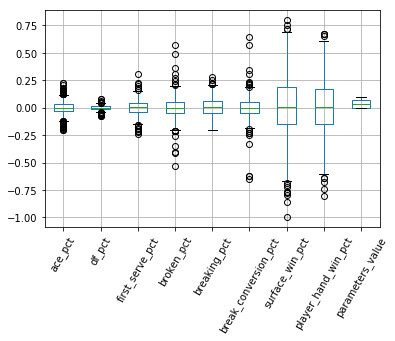

In [170]:
import matplotlib.pyplot as plt
boxplot=final_result_1.boxplot(['ace_pct','df_pct', 'first_serve_pct', 'broken_pct', 'breaking_pct', 'break_conversion_pct', 'surface_win_pct', 'player_hand_win_pct', 'parameters_value'])
plt.xticks(rotation=60)
plt.show()

In [230]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# boxplot=boxplot([X_train_scaled])
# plt.show()

TypeError: 'AxesSubplot' object is not callable

In [198]:
#create a pipeline, scale, add polynomial features, apply logistic regression model, grid search with cross-validation 
#over parameters for C and polynomial degrees
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe=make_pipeline(StandardScaler(), PolynomialFeatures(),LogisticRegression())
param_grid={'polynomialfeatures__degree': [0,1,2,3],
    'logisticregression__C':[.001,.01,.1,1,10,100]}
grid=GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(X_train, y_train)
print("Best Parameters: {}".format(grid.best_params_))
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))


Best Parameters: {'logisticregression__C': 0.01, 'polynomialfeatures__degree': 1}
Best Cross Validation Score: 0.64
Test Score: 0.65


In [222]:
#polynomialfeatures, only with interactions, 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe=make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only=True, include_bias=False),LogisticRegression())
param_grid={
    'logisticregression__C':[.001,.01,.1,1,10,100]}
grid=GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(X_train, y_train)
print("Best Parameters: {}".format(grid.best_params_))
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))


Best Parameters: {'logisticregression__C': 0.001}
Best Cross Validation Score: 0.64
Test Score: 0.65


In [199]:
#take out the polynomials
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe=make_pipeline(StandardScaler(), LogisticRegression())
param_grid={'logisticregression__C':[.001,.01,.1,1,10,100]}
grid=GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(X_train, y_train)
print("Best Parameters: {}".format(grid.best_params_))
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))

Best Parameters: {'logisticregression__C': 0.001}
Best Cross Validation Score: 0.64
Test Score: 0.64


In [217]:
#grid search which model to use, and model parameters, compares SVC with Randomforest and GradientBoostingClassifier, for SVC, searching over whether
#should scale the data or not, no preprocessing for Randomforest ...other parameters seearched over as noted below..
#model parameters searched tested for best on validation set, then once selected, scored on final hold-out test set...
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
pipe=Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid =[{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
    'classifier__gamma':[0.001, .01, .1,1,10,100],
    'classifier__C': [0.001, .01, .1,1,10,100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
    'preprocessing': [None], 'classifier__max_features': [1,2,3]},
    {'classifier':[GradientBoostingClassifier(random_state=0, n_estimators=20, max_depth=3)],
     'preprocessing':[StandardScaler(), None], 'classifier__learning_rate':[.01,1,10]}]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid=GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:\n {}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best parameters:
 {'classifier': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 1, 'classifier__gamma': 10, 'preprocessing': None}

Best cross-validation score: 0.65
Test-set score: 0.65


In [219]:
#Dummy classifier, makes random predictions, but produces classes with the same proportions as in the training set:
from sklearn.dummy import DummyClassifier
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)
dummy=DummyClassifier().fit(X_train, y_train)
pred_dummy=dummy.predict(X_test)
print('dummy score:{:.2f}'.format(dummy.score(X_test, y_test)))


dummy score:0.51


In [221]:
#the upper left is True Negative, bottom right is True Positive, upper right False Positive, Lower left False Negative
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, grid.predict(X_test))
print('Confusion matrix:\n{}'.format(confusion))


Confusion matrix:
[[199 135]
 [ 85 209]]


In [225]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, grid.decision_function(X_test))


In [232]:
from sklearn.metrics import classification_report
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions, target_names=['player_1 loss', 'player_1 win']))

               precision    recall  f1-score   support

player_1 loss       0.68      0.64      0.66       334
 player_1 win       0.62      0.65      0.63       294

  avg / total       0.65      0.65      0.65       628



In [ ]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false 
#positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is 
#negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score 
#reaches its best value at 1 and worst score at 0.The F-beta score weights recall more than precision by a factor 
#of beta. beta == 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_true.

In [236]:
#Deep Learning
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [238]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled.shape

(1883, 9)

In [239]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


Using TensorFlow backend.


In [240]:
y_train_categorical.shape

(1883, 2)

In [247]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=9))
model.add(Dense(units=2, activation='softmax'))


In [248]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [249]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.7728 - acc: 0.6001
Epoch 2/100
 - 0s - loss: 0.7240 - acc: 0.6219
Epoch 3/100
 - 0s - loss: 0.6965 - acc: 0.6330
Epoch 4/100
 - 0s - loss: 0.6798 - acc: 0.6378
Epoch 5/100
 - 0s - loss: 0.6686 - acc: 0.6383
Epoch 6/100
 - 0s - loss: 0.6606 - acc: 0.6437
Epoch 7/100
 - 0s - loss: 0.6548 - acc: 0.6421
Epoch 8/100
 - 0s - loss: 0.6511 - acc: 0.6495
Epoch 9/100
 - 0s - loss: 0.6478 - acc: 0.6516
Epoch 10/100
 - 0s - loss: 0.6452 - acc: 0.6474
Epoch 11/100
 - 0s - loss: 0.6427 - acc: 0.6479
Epoch 12/100
 - 0s - loss: 0.6414 - acc: 0.6495
Epoch 13/100
 - 0s - loss: 0.6402 - acc: 0.6479
Epoch 14/100
 - 0s - loss: 0.6395 - acc: 0.6564
Epoch 15/100
 - 0s - loss: 0.6378 - acc: 0.6559
Epoch 16/100
 - 0s - loss: 0.6370 - acc: 0.6537
Epoch 17/100
 - 0s - loss: 0.6365 - acc: 0.6522
Epoch 18/100
 - 0s - loss: 0.6358 - acc: 0.6532
Epoch 19/100
 - 0s - loss: 0.6347 - acc: 0.6527
Epoch 20/100
 - 0s - loss: 0.6341 - acc: 0.6527
Epoch 21/100
 - 0s - loss: 0.6337 - acc: 0.6527
E

In [250]:
#For this network, we simply add an additional hidden layer of 6 nodes
deep_model = Sequential()
deep_model.add(Dense(units=10, activation='relu', input_dim=9))
deep_model.add(Dense(units=10, activation='relu', input_dim=9))# one extra hidden layer
deep_model.add(Dense(units=2, activation='softmax'))

In [251]:
deep_model.summary()

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [252]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.7018 - acc: 0.5119
Epoch 2/100
 - 0s - loss: 0.6753 - acc: 0.5656
Epoch 3/100
 - 0s - loss: 0.6627 - acc: 0.6097
Epoch 4/100
 - 0s - loss: 0.6554 - acc: 0.6283
Epoch 5/100
 - 0s - loss: 0.6496 - acc: 0.6383
Epoch 6/100
 - 0s - loss: 0.6460 - acc: 0.6314
Epoch 7/100
 - 0s - loss: 0.6450 - acc: 0.6277
Epoch 8/100
 - 0s - loss: 0.6407 - acc: 0.6352
Epoch 9/100
 - 0s - loss: 0.6382 - acc: 0.6373
Epoch 10/100
 - 0s - loss: 0.6359 - acc: 0.6415
Epoch 11/100
 - 0s - loss: 0.6345 - acc: 0.6437
Epoch 12/100
 - 0s - loss: 0.6328 - acc: 0.6447
Epoch 13/100
 - 0s - loss: 0.6306 - acc: 0.6500
Epoch 14/100
 - 0s - loss: 0.6297 - acc: 0.6474
Epoch 15/100
 - 0s - loss: 0.6278 - acc: 0.6511
Epoch 16/100
 - 0s - loss: 0.6262 - acc: 0.6543
Epoch 17/100
 - 0s - loss: 0.6248 - acc: 0.6601
Epoch 18/100
 - 0s - loss: 0.6236 - acc: 0.6543
Epoch 19/100
 - 0s - loss: 0.6224 - acc: 0.6548
Epoch 20/100
 - 0s - loss: 0.6212 - acc: 0.6612
Epoch 21/100
 - 0s - loss: 0.6207 - acc: 0.6612
E

In [253]:
#Compare the Models
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.642276242280462, Accuracy: 0.635350318850985


In [254]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.6551084328608908, Accuracy: 0.6480891712152275
